#  Books Sales and Rating Analysis

**Technologies:** *Python, NumPy, Pandas, Matplotlib, Seaborn*

###  Project Objectives:

- Analyze trends in **book sales** and **user ratings**
- Explore **genre distribution**, **publication years**, and **author-wise popularity**
- Perform **data cleaning and preprocessing** for accuracy and consistency
- Visualize **key insights and patterns** through impactful charts and plots


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')        
sns.set_palette('tab10') 

***Load Dataset***

In [3]:
df=pd.read_csv("Books_Data_Clean.csv")

***Data Overview***

In [5]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [9]:
df.shape

(1070, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [15]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


***Fixing negative value of Publishing Year***

In [22]:
df=df[df['Publishing Year']>1900]

***Checking Null Values in Dataset***

In [24]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [26]:
df.dropna(subset="Book Name",inplace=True)

***Checking duplicates in Dataset***

In [30]:
df.duplicated().sum()

0

***Checking Unique Values in Dataset***

In [37]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

***Histogram of Publishing Year***

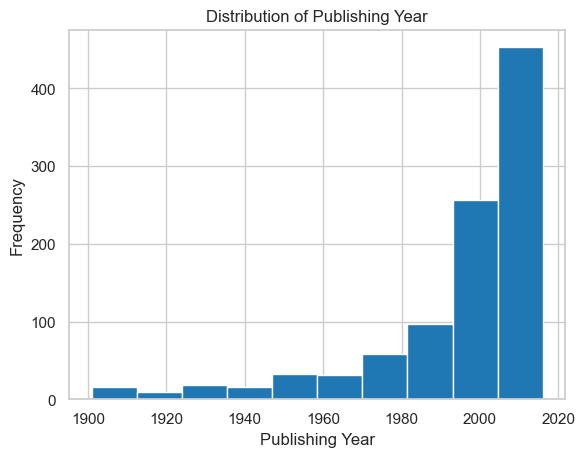

In [46]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

***Bar Chart of Number of Books in each Genre***

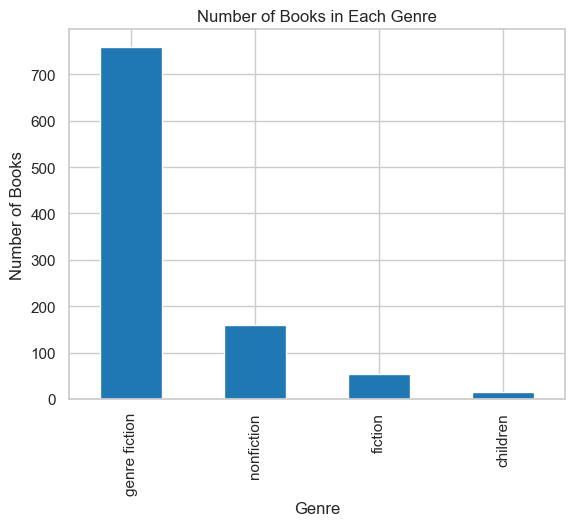

In [51]:
df["genre"].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in Each Genre")
plt.show()

In [57]:
#group by author coloumn on the basis of Book Average rating
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

***Box Plot of Book Ratings Count for each Genre***

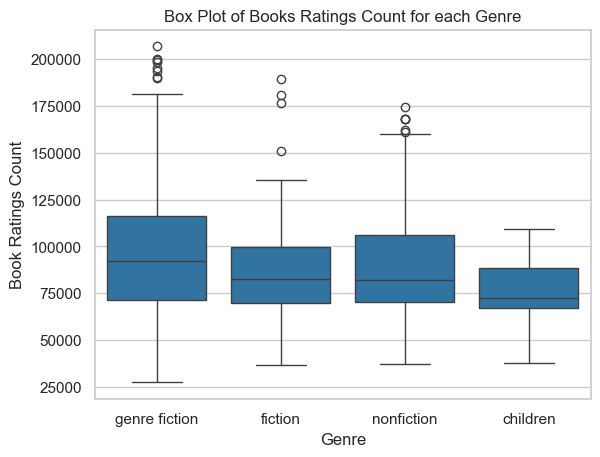

In [83]:
sns.boxplot(x="genre",y="Book_ratings_count",data=df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Box Plot of Books Ratings Count for each Genre")
plt.show()

***Scatter Plot of Scale Price and Unit Sold***

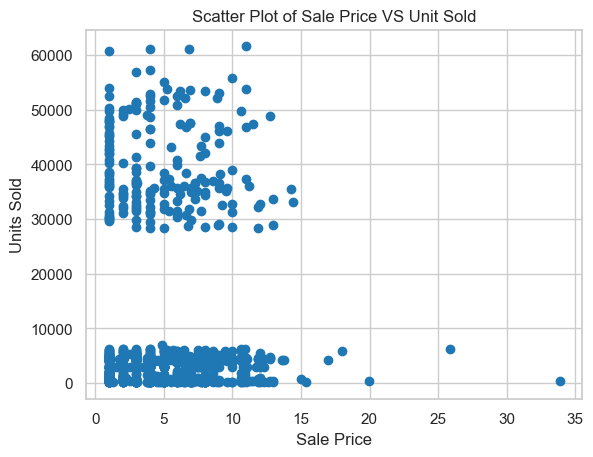

In [86]:
plt.scatter(df["sale price"],df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Sale Price VS Unit Sold")
plt.show()

**When Sale Price drops Unit Sold Increases**

***Language Code***

In [105]:
Lang_counts=df["language_code"].value_counts()

***Pie Chart of Language Distribution***

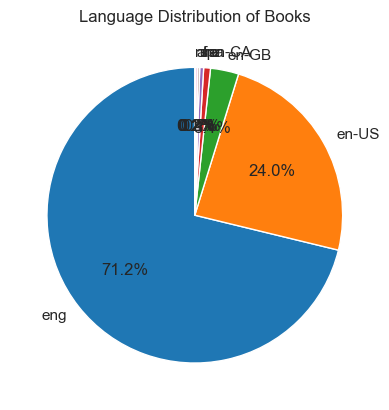

In [111]:
plt.pie(Lang_counts,labels=lang_counts.index,startangle=90,autopct="%1.1f%%")
plt.title("Language Distribution of Books")
plt.show()

***Publisher***

In [124]:
df.groupby('Publisher ')["publisher revenue"].sum().sort_values(ascending=False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [135]:
df.groupby('Author_Rating')["Book_ratings_count"].mean().sort_values(ascending=False)

Author_Rating
Intermediate    101400.272569
Famous           98295.250000
Novice           87318.464286
Excellent        83804.800595
Name: Book_ratings_count, dtype: float64

In [137]:
df.groupby("language_code").size().sort_values(ascending=False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [141]:
df.groupby("Author_Rating")["Book_ratings_count"].max()

Author_Rating
Excellent       167848
Famous          206792
Intermediate    199872
Novice          155903
Name: Book_ratings_count, dtype: int64

***Scatter Plot of Book Average Rating and Book Ratings Count***

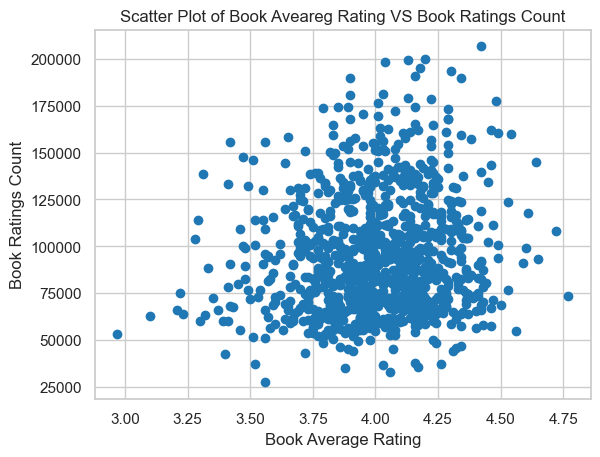

In [151]:
plt.scatter(df['Book_average_rating'],df['Book_ratings_count'])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Scatter Plot of Book Aveareg Rating VS Book Ratings Count")
plt.show()

***Bar Chart of Total Gross Sales for each Author***

In [177]:
gross_sales=df.groupby("Author")['gross sales'].sum()

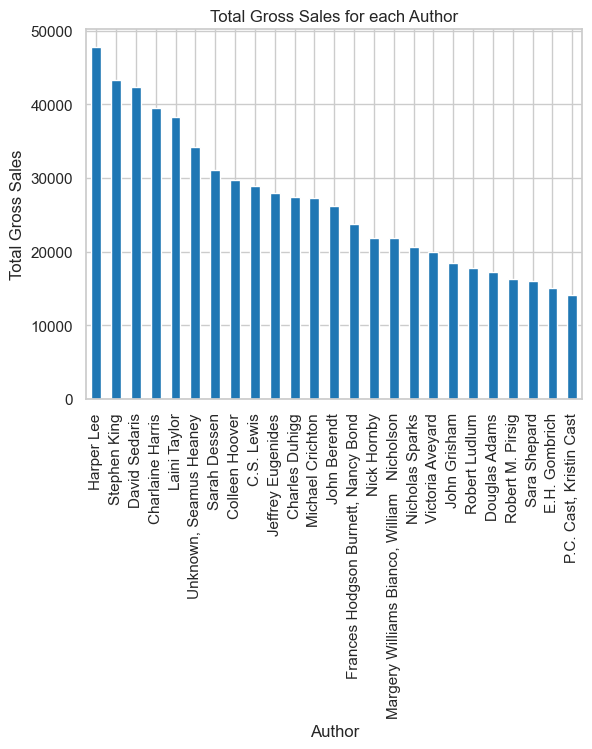

In [189]:
gross_sales.sort_values(ascending=False).head(25).plot(kind='bar')
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales for each Author")
plt.show()

***Box Plot of Unit Sold for each Author Rating***

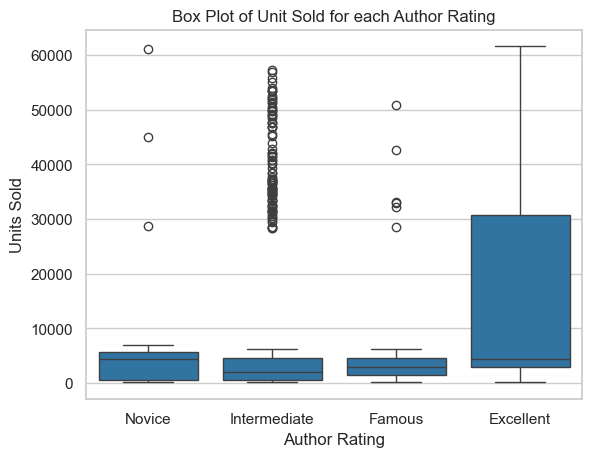

In [196]:
sns.boxplot(x="Author_Rating",y="units sold",data = df) 
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Box Plot of Unit Sold for each Author Rating")
plt.show()

***Line graph of Total Units Sold over the Years***

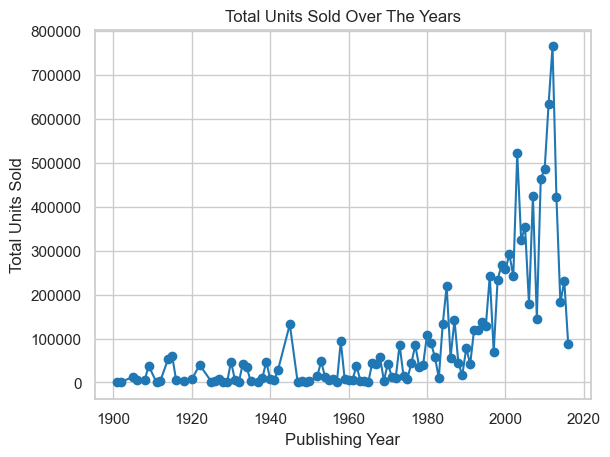

In [200]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind='line',marker="o")
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over The Years")
plt.show()

##  Summary of Insights

- The majority of books in the dataset were published between **2000 and 2020**, reflecting a highly active period in the publishing industry.
- The **Fiction** genre dominates the dataset in terms of the number of books published, indicating strong reader interest in narrative-driven content.
- A clear **inverse relationship** was observed between **sale price** and **units sold** — as the price drops, the number of units sold tends to increase.
- **English** is the most widely represented language, highlighting its global dominance in book publication and readership.
- Most books cluster around an **average rating of 4.0**, suggesting a generally favorable reception from readers.
- **Harper Lee** stands out as the author with the **highest total gross sales**, indicating exceptional commercial success.
- Books written by **intermediate-rated authors** (neither very high nor very low average ratings) showed the **highest unit sales**, possibly reflecting broader reader accessibility or mass-market appeal.

**Overall, this analysis offers valuable insights into book publishing trends, sales dynamics, and reader preferences—providing a strong foundation for further predictive modeling or recommendation systems.**
